# Analisa Statistik - uji stasioneritas

In [3]:
# pustaka untuk manipulasi data
import pandas as pd
from pandas import concat
from pandas import DataFrame
from pandas import read_csv
from pandas import read_excel
import numpy as np
from numpy import concatenate

# pustaka untuk waktu komputasi
import time
from datetime import datetime

# Pustaka untuk visualisasi data
import seaborn as sns
from matplotlib import pyplot
from matplotlib import pyplot as plt

# Pustaka untuk visualisasi acf dan pacf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# pustaka normalisasi data / membuat data latih dan data uji.
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import minmax_scaling

# pustaka uji stasioneritas statsmodel
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# pustaka uji stasioneritas arch
from arch.unitroot import *
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

### 1. Akuisisi Data

In [4]:
# Set waktu komputasi
start = time.time()

In [5]:
# fix random seed for reproducibility
np.random.seed(1234)

In [6]:
dataset = pd.read_csv("dataset/dataset_boptn.csv", parse_dates=["acq_date"])

In [7]:
# # set index tanggal
# dataset = dataset.set_index("tanggal")

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  276 non-null    datetime64[ns]
 1   hotspot   276 non-null    int64         
 2   soi_anom  276 non-null    float64       
 3   soi_std   276 non-null    float64       
 4   sst_anom  276 non-null    float64       
 5   sst_std   276 non-null    float64       
 6   oni_anom  276 non-null    float64       
 7   oni_std   276 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 17.4 KB


In [11]:
dataset

,acq_date,hotspot,soi_anom,soi_std,sst_anom,sst_std,oni_anom,oni_std
0,2001-01-31,3,1.6,1.0,-0.76,25.81,-0.68,25.88
1,2001-02-28,5,2.8,1.7,-0.56,26.18,-0.52,26.26
2,2001-03-31,10,1.5,0.9,-0.37,26.86,-0.44,26.76
3,2001-04-30,20,0.3,0.2,-0.56,27.24,-0.34,27.25
4,2001-05-31,39,-0.8,-0.5,-0.46,27.42,-0.25,27.49
...,...,...,...,...,...,...,...,...
271,2023-08-31,186,-1.4,-0.8,1.30,28.20,1.32,28.28
272,2023-09-30,2247,-2.1,-1.3,1.53,28.29,1.56,28.32
273,2023-10-31,3200,-0.8,-0.5,1.59,28.36,1.78,28.49
274,2023-11-30,390,-1.3,-0.8,1.90,28.72,1.92,28.60


- Studi Kasus Sumatera Selatan

In [12]:
# memilih area studi
df_sumsel = dataset[["hotspot"]].copy()
df_sumsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   hotspot  276 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


In [14]:
print(df_sumsel)

     hotspot
0          3
1          5
2         10
3         20
4         39
..       ...
271      186
272     2247
273     3200
274      390
275       42

[276 rows x 1 columns]


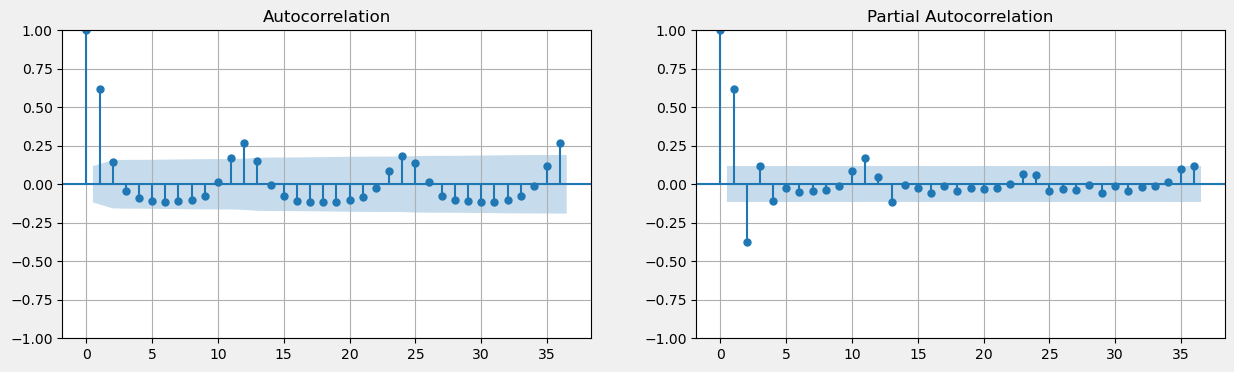

In [15]:
# code autocorrelation
# membuat frame
fig, ax= plt.subplots(nrows=1, ncols=2, facecolor="#F0F0F0", figsize = (15,4))
plot_acf(df_sumsel, lags=36, ax=ax[0])
plot_pacf(df_sumsel,lags=36, ax=ax[1])
ax[0].grid(True)
ax[1].grid(True)
plt.show()

### 2. Normalisasi Data (Max-Min)

In [18]:
# memanggil fungsi max min scaler
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [19]:
# proses max min scaler
df_norm = scaler.fit_transform(df_sumsel)

In [20]:
np.round(df_norm[:5],6)

array([[0.      ],
       [0.000139],
       [0.000485],
       [0.001178],
       [0.002494]])

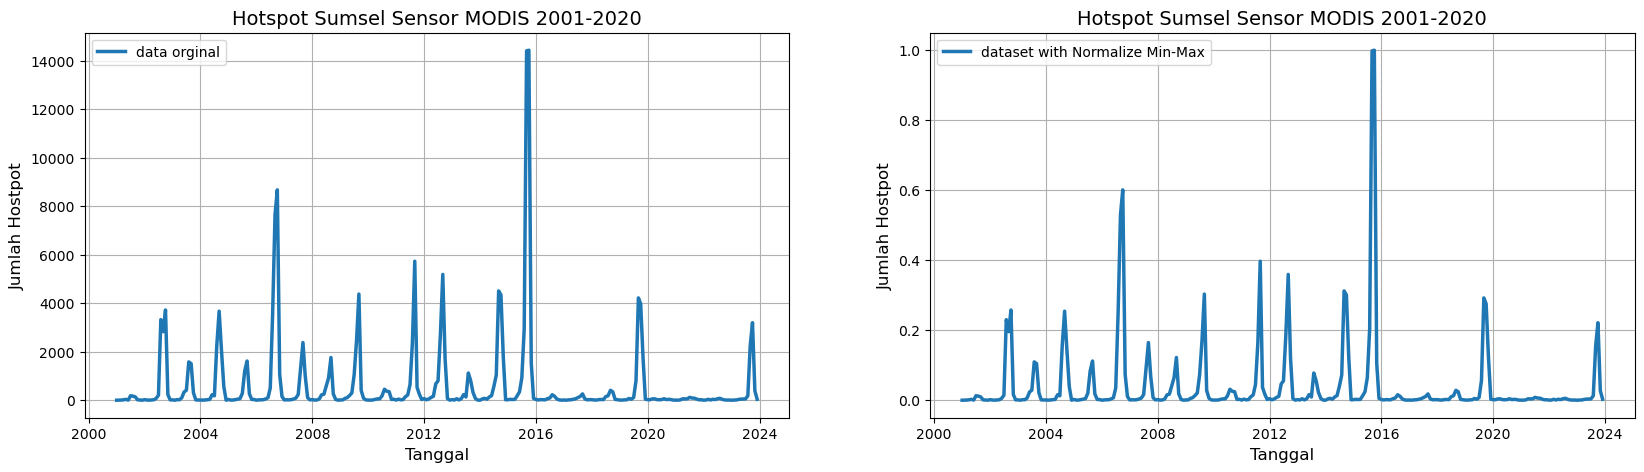

In [21]:
# generate urutan data sesuai panjang datanya
x = pd.date_range(start="2001-01-01", periods=len(df_sumsel), freq='MS')

# membuat frame
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20,5))

# Plot dataset non normalize min-max
# -------------------------------------------------------------------------------
# membuat time series plot
ax1.plot(x, df_sumsel, color="tab:blue", label="data orginal", linewidth=2.5)

# membuat label-label
ax1.set_title("Hotspot Sumsel Sensor MODIS 2001-2020", fontsize=14)
ax1.set_xlabel("Tanggal", fontsize=12)
ax1.set_ylabel("Jumlah Hostpot", fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)


# Plot dataset with normalize min-max
# -------------------------------------------------------------------------------
# membuat time series plot
ax2.plot(x, df_norm, color="tab:blue", label="dataset with Normalize Min-Max", linewidth=2.5)

# membuat label-label
ax2.set_title("Hotspot Sumsel Sensor MODIS 2001-2020", fontsize=14)
ax2.set_xlabel("Tanggal", fontsize=12)
ax2.set_ylabel("Jumlah Hostpot", fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True)

# menampilkan plot
plt.show()

### Uji-Stasioneritas (Statsmodels)

**ADF Test with statsmodel**
- https://machinelearningmastery.com/time-series-data-stationary-python/
- https://docs.w3cub.com/statsmodels/generated/statsmodels.tsa.stattools.adfuller
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [ ]:
# Formula ADF Test
# result = adfuller(df_sumsel, maxlag=24, autolag='AIC')
result = adfuller(df_sumsel, autolag=None)

# print result ADF Tes 
print("----------------------------------")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'n-lags: {result[2]}')
print(f'n-obs: {result[3]}')

print("----------------------------------")
print('Critial Values:')
for key, value in result[4].items():
    print(f'   {key}, {value}')

In [ ]:
if result[1] <= 0.05:
    print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
else:
    print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary.')

### Uji-Stasioneritas (ARCH toolbox)

**ADF Test with ARCH toolbox**
- https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.ADF.html

Hipotesis 0 (H0): data terdapat akar unit. Artinya data bersifat non-stasioner\
Hipotesis 1 (H1): data terdapat tidak akar unit. Artinya data bersifat stasioner

Jika p-value > 0.05 => Terima H0\
Jika p-value <= 0.05 => Terima H1 

In [ ]:
adf = ADF(df_sumsel, lags=15)
print(adf.summary().as_text())

In [ ]:
# check linier regression with OLS
reg_res = adf.regression
print(reg_res.summary().as_text())

**PP Test with ARCH toolbook**
- https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.PhillipsPerron.html

Hipotesis 0 (H0): data terdapat akar unit. Artinya data bersifat non-stasioner\
Hipotesis 1 (H1): data terdapat tidak akar unit. Artinya data bersifat stasioner

Jika p-value > 0.05 => Terima H0\
Jika p-value <= 0.05 => Terima H1 

In [ ]:
pp = PhillipsPerron(df_sumsel, lags=15)
print(pp.summary().as_text())

In [ ]:
# # check linier regression with OLS
# reg_res = pp.regression
# print(reg_res.summary().as_text())

**KPSS Test with ARCH toolbook**
- https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.KPSS.html

Hipotesis 0 (H0): data bersifat stasioner\
Hipotesis 1 (H1): data bersifat non-stasioner

In [ ]:
kpss = KPSS(df_sumsel, lags=15)
print(kpss.summary().as_text())

### Uji-Stasioneritas (Barlett dan Levene) pada nilai ragam

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene
from statistics import mean

In [ ]:
x = dataset["hotspot_sumsel"].values

In [ ]:
def normalize(x):
    return ((x - mean(x)) / (max(x) - min(x)))

In [ ]:
def normalize_1(x, a, b):
    return a + (((x - min(x)) * (b - a)) / (max(x) - min(x)))

In [ ]:
x1 = normalize_1(x, -1, 1)

In [ ]:
# membuat frame
fig, ax1 = plt.subplots(figsize = (20,5))

# Plot dataset non normalize min-max
# -------------------------------------------------------------------------------
# membuat time series plot
ax1.plot(x1, color="tab:blue", label="data orginal", linewidth=2.5)

# membuat label-label
ax1.set_title("Hotspot Sumsel Sensor MODIS 2001-2020", fontsize=14)
ax1.set_xlabel("Tanggal", fontsize=12)
ax1.set_ylabel("Jumlah Hostpot", fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)

# menampilkan plot
plt.show()